# Accuracies achieved on different models

   Linear Regression - 03.24 %    
   KNN Regression    - 35.37 %    
   Decision Tree     - 94.72 %    
   Random Forest     - 96.95 %   








In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Reading dataset train.csv into dataframe train 
train = pd.read_csv('train.csv')

In [187]:
# Assigning numeric values to categorical feature
train['IsHoliday'] = (train['IsHoliday'] ).astype(int)
train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


In [188]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,0
421566,45,98,2012-10-05,628.10,0
421567,45,98,2012-10-12,1061.02,0
421568,45,98,2012-10-19,760.01,0
421569,45,98,2012-10-26,1076.80,0


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.1+ MB


In [190]:
# Reading dataset test.csv into dataframe test 
test = pd.read_csv('test.csv')

# Assigning numeric values to categorical feature 
test['IsHoliday'] = (test['IsHoliday'] ).astype(int)

test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,0
1,1,1,2012-11-09,0
2,1,1,2012-11-16,0
3,1,1,2012-11-23,1
4,1,1,2012-11-30,0


In [191]:
test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,0
115060,45,98,2013-07-05,0
115061,45,98,2013-07-12,0
115062,45,98,2013-07-19,0
115063,45,98,2013-07-26,0


In [192]:
# Reading dataset features.csv into dataframe features 
feat = pd.read_csv('features.csv')
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [193]:
feat.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [194]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [0]:
# Dimensionality Reduction
feat = feat.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [196]:
# Assigning numeric values to categorical feature 
feat['IsHoliday'] = (feat['IsHoliday'] ).astype(int)
feat

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,0
8186,45,2013-07-05,77.50,3.614,NaN,NaN,0
8187,45,2013-07-12,79.37,3.614,NaN,NaN,0
8188,45,2013-07-19,82.84,3.737,NaN,NaN,0


In [197]:
# Splitting features dataframe into training feat_train and testing feat_test
feat_test = feat[feat['Date']>'2012-10-26']
feat_test

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
143,1,2012-11-02,55.32,3.386,223.462779,6.573,0
144,1,2012-11-09,61.24,3.314,223.481307,6.573,0
145,1,2012-11-16,52.92,3.252,223.512911,6.573,0
146,1,2012-11-23,56.23,3.211,223.561947,6.573,1
147,1,2012-11-30,52.34,3.207,223.610984,6.573,0
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,0
8186,45,2013-07-05,77.50,3.614,NaN,NaN,0
8187,45,2013-07-12,79.37,3.614,NaN,NaN,0
8188,45,2013-07-19,82.84,3.737,NaN,NaN,0


In [198]:
feat_train = feat[feat['Date']<='2012-10-26']
feat_train

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...
8146,45,2012-09-28,64.88,3.997,192.013558,8.684,0
8147,45,2012-10-05,64.89,3.985,192.170412,8.667,0
8148,45,2012-10-12,54.47,4.000,192.327265,8.667,0
8149,45,2012-10-19,56.47,3.969,192.330854,8.667,0


In [199]:
train[train['Date']=='2010-02-05']

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
143,1,2,2010-02-05,50605.27,0
286,1,3,2010-02-05,13740.12,0
429,1,4,2010-02-05,39954.04,0
572,1,5,2010-02-05,32229.38,0
...,...,...,...,...,...
420727,45,92,2010-02-05,68203.08,0
420870,45,93,2010-02-05,4002.34,0
421147,45,95,2010-02-05,63833.63,0
421292,45,97,2010-02-05,8393.22,0


In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.1+ MB


In [201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.5+ MB


In [202]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 448.0+ KB


In [203]:
feat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 8150
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   IsHoliday     6435 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 402.2+ KB


In [204]:
feat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 143 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1755 non-null   int64  
 1   Date          1755 non-null   object 
 2   Temperature   1755 non-null   float64
 3   Fuel_Price    1755 non-null   float64
 4   CPI           1170 non-null   float64
 5   Unemployment  1170 non-null   float64
 6   IsHoliday     1755 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 109.7+ KB


In [205]:
# Filling null values with mean values
feat_test['CPI'].fillna(feat_test['CPI'].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [206]:
feat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 143 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1755 non-null   int64  
 1   Date          1755 non-null   object 
 2   Temperature   1755 non-null   float64
 3   Fuel_Price    1755 non-null   float64
 4   CPI           1755 non-null   float64
 5   Unemployment  1170 non-null   float64
 6   IsHoliday     1755 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 109.7+ KB


In [207]:
# Filling null values with mean values
feat_test['Unemployment'].fillna(feat_test['Unemployment'].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [208]:
feat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 143 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1755 non-null   int64  
 1   Date          1755 non-null   object 
 2   Temperature   1755 non-null   float64
 3   Fuel_Price    1755 non-null   float64
 4   CPI           1755 non-null   float64
 5   Unemployment  1755 non-null   float64
 6   IsHoliday     1755 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 109.7+ KB


In [209]:
feat_train.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [210]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [211]:
# Getting train_ft dataframe with all training features by merging train and feat_train
train_ft = pd.merge(train, feat_train, how='inner', on=['Store','Date'])
train_ft.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106,0


In [0]:
# Remove extra generated IsHoliday_y column
train_ft.drop('IsHoliday_y',axis=1,inplace=True)
train_ft.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [213]:
train_ft.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106


In [214]:
# Getting test_ft dataframe with all testing features by merging test and feat_test
test_ft = pd.merge(test, feat_test, how='inner', on=['Store','Date'])
test_ft.head()


,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,0
1,1,2,2012-11-02,0,55.32,3.386,223.462779,6.573,0
2,1,3,2012-11-02,0,55.32,3.386,223.462779,6.573,0
3,1,4,2012-11-02,0,55.32,3.386,223.462779,6.573,0
4,1,5,2012-11-02,0,55.32,3.386,223.462779,6.573,0


In [215]:
test_ft.tail()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
115059,45,93,2013-07-26,0,76.06,3.804,177.314094,6.879006,0
115060,45,94,2013-07-26,0,76.06,3.804,177.314094,6.879006,0
115061,45,95,2013-07-26,0,76.06,3.804,177.314094,6.879006,0
115062,45,97,2013-07-26,0,76.06,3.804,177.314094,6.879006,0
115063,45,98,2013-07-26,0,76.06,3.804,177.314094,6.879006,0


In [216]:
# Remove extra generated IsHoliday_y column
test_ft.drop('IsHoliday_y',axis=1,inplace=True)
test_ft.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
test_ft.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573
1,1,2,2012-11-02,0,55.32,3.386,223.462779,6.573
2,1,3,2012-11-02,0,55.32,3.386,223.462779,6.573
3,1,4,2012-11-02,0,55.32,3.386,223.462779,6.573
4,1,5,2012-11-02,0,55.32,3.386,223.462779,6.573


In [217]:
test_ft.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
115059,45,93,2013-07-26,0,76.06,3.804,177.314094,6.879006
115060,45,94,2013-07-26,0,76.06,3.804,177.314094,6.879006
115061,45,95,2013-07-26,0,76.06,3.804,177.314094,6.879006
115062,45,97,2013-07-26,0,76.06,3.804,177.314094,6.879006
115063,45,98,2013-07-26,0,76.06,3.804,177.314094,6.879006


In [218]:
train_ft.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106


In [162]:
train_ft.shape

(421570, 9)

In [163]:
test_ft.shape

(115064, 8)

In [0]:
# Separate Date column which has strings into numeric columns and drop Date column

train_ft['Date'] = pd.to_datetime(train_ft['Date'])

train_ft['Week'] = train_ft['Date'].dt.week
#The day of the week with Monday=0, Sunday=6.
train_ft['Day_of_week'] =train_ft['Date'].dt.dayofweek

train_ft['Month'] =train_ft['Date'].dt.month 
train_ft['Year'] =train_ft['Date'].dt.year
train_ft['Day'] =train_ft['Date'].dt.day 

train_ft.drop('Date',axis=1,inplace=True)

test_ft['Date'] = pd.to_datetime(test_ft['Date'])
test_ft['Week'] = test_ft['Date'].dt.week
test_ft['Day_of_week'] =test_ft['Date'].dt.dayofweek

test_ft['Month'] =test_ft['Date'].dt.month 
test_ft['Year'] =test_ft['Date'].dt.year
test_ft['Day'] =test_ft['Date'].dt.day

test_ft.drop('Date',axis=1,inplace=True)

In [221]:
train_ft.shape

(421570, 13)

In [222]:
test_ft.shape

(115064, 12)

In [223]:
train_ft.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Day_of_week,Month,Year,Day
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5


In [224]:
test_ft.tail()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Day_of_week,Month,Year,Day
115059,45,93,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115060,45,94,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115061,45,95,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115062,45,97,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115063,45,98,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26


In [0]:
# TRAINING MODEL ( LINEAR REGRESSION )

In [0]:
from sklearn.model_selection import train_test_split

X = train_ft.drop('Weekly_Sales',axis=1)
y = train_ft['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [226]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

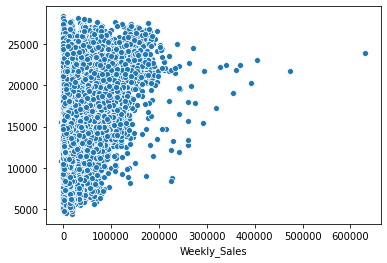

In [227]:
# Predicting for splitted training dataset 
import seaborn as sns
pred_lm = lm.predict(X_test)
sns.scatterplot(y_test,pred_lm)

In [228]:
print('Accuracy : ',metrics.explained_variance_score(y_test,pred_lm)*100,'%')

Accuracy :  3.2438337662764383 %


In [229]:
# TRAINING MODEL ( Random Forest )

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100 )

# Fit on training data
rf.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
pred_rf=rf.predict(X_test)


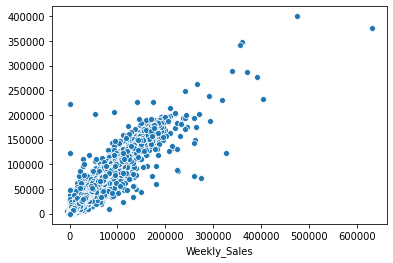

In [231]:
sns.scatterplot(y_test,pred_rf)

In [232]:
print('Accuracy : ',metrics.explained_variance_score(y_test,pred_rf)*100,'%')

Accuracy :  96.94730259861997 %


In [0]:
# TRAINING MODEL ( DECISION TREE)

In [234]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fit on training data
dt.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
pred_dt=dt.predict(X_test)

In [236]:
print('Accuracy : ',metrics.explained_variance_score(y_test,pred_dt)*100,'%')

Accuracy :  94.71532452300514 %


In [0]:
# TRAINING MODEL (  KNN Regressor  )

In [238]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=4, n_neighbors=10, p=2,
                    weights='uniform')

In [0]:
pred_knn = knn.predict(X_test)

In [240]:
print('Accuracy : ',metrics.explained_variance_score(y_test,pred_knn)*100,'%')

Accuracy :  35.370124812184066 %


In [0]:
# SVR could not be implemented as the dataset was too large for it (>10000)

In [0]:
# Predictions on Testing values ie future values

In [243]:
test_ft.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Day_of_week,Month,Year,Day
0,1,1,0,55.32,3.386,223.462779,6.573,44,4,11,2012,2
1,1,2,0,55.32,3.386,223.462779,6.573,44,4,11,2012,2
2,1,3,0,55.32,3.386,223.462779,6.573,44,4,11,2012,2
3,1,4,0,55.32,3.386,223.462779,6.573,44,4,11,2012,2
4,1,5,0,55.32,3.386,223.462779,6.573,44,4,11,2012,2


In [244]:
test_ft.tail()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Day_of_week,Month,Year,Day
115059,45,93,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115060,45,94,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115061,45,95,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115062,45,97,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26
115063,45,98,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26


In [0]:
X_test_estimation = test_ft
pred_estimation = rf.predict(X_test_estimation)

In [0]:
# Adding estimated Weekly_Sales to test_ft

In [0]:
test_ft['Weekly_Sales_Estimated'] = pred_estimation

In [248]:
test_ft

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Day_of_week,Month,Year,Day,Weekly_Sales_Estimated
0,1,1,0,55.32,3.386,223.462779,6.573000,44,4,11,2012,2,25714.2022
1,1,2,0,55.32,3.386,223.462779,6.573000,44,4,11,2012,2,48386.3520
2,1,3,0,55.32,3.386,223.462779,6.573000,44,4,11,2012,2,10337.7969
3,1,4,0,55.32,3.386,223.462779,6.573000,44,4,11,2012,2,39829.1064
4,1,5,0,55.32,3.386,223.462779,6.573000,44,4,11,2012,2,25576.6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26,5179.5302
115060,45,94,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26,7964.8151
115061,45,95,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26,46009.1178
115062,45,97,0,76.06,3.804,177.314094,6.879006,30,4,7,2013,26,7266.2388
